In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
# from keras.layers import Dense, Dropout, Activation, LSTM, Convolution1D, MaxPooling1D, Flatten
# from keras.models import Sequential
import matplotlib.pyplot as plt

%matplotlib inline
from torchbearer import Trial
import os

In [2]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchbearer
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision.datasets import MNIST
from torchbearer import Trial
import torchvision.transforms as transforms

In [3]:
%ls

 驱动器 D 中的卷是 Data
 卷的序列号是 F66F-4A2F

 D:\projects\Stock-Market-Price-Prediction-master 的目录

2019/08/08  11:09    <DIR>          .
2019/08/08  11:09    <DIR>          ..
2019/08/08  10:48    <DIR>          .git
2019/08/08  10:51    <DIR>          .ipynb_checkpoints
2019/06/22  15:43           363,722 ^DJI.csv
2019/06/26  00:18           103,280 ^GSPC.csv
2019/07/11  16:40           165,190 ^GSPC_2011_06_01-2019_06_01.csv
2019/07/11  13:20    <DIR>          __pycache__
2019/07/20  13:26            41,117 1d_conv.weights
2019/07/20  08:46           381,476 5_1_CNN-Copy1.ipynb
2019/06/24  16:48           335,219 Archive.zip
2019/08/01  03:32               658 CBOE yearly 04-18.csv
2019/07/22  04:20    <DIR>          data
2019/08/01  03:32           189,414 EUR_GBP 05-16.csv
2019/08/01  03:32           189,007 EUR_JPY 05-16.csv
2019/08/01  03:32           189,396 EUR_USD 05-16.csv
2019/08/01  03:32           189,370 GBP_JPY 05-16.csv
2019/08/01  03:32           189,425 GBP_USD 05-16.csv
2019

In [4]:
datapath = os.path.join(os.getcwd(), 'data')
datapath

'D:\\projects\\Stock-Market-Price-Prediction-master\\data'

In [5]:
%ls data

 驱动器 D 中的卷是 Data
 卷的序列号是 F66F-4A2F

 D:\projects\Stock-Market-Price-Prediction-master\data 的目录

2019/07/22  04:20    <DIR>          .
2019/07/22  04:20    <DIR>          ..
2019/07/22  04:20           178,424 ^TNX.csv
2019/07/14  16:21           190,344 ^VIX.csv
2019/06/14  11:01               658 CBOE yearly 04-18.csv
2019/06/14  11:51           189,414 EUR_GBP 05-16.csv
2019/06/14  11:47           189,007 EUR_JPY 05-16.csv
2019/06/14  11:44           189,396 EUR_USD 05-16.csv
2019/06/14  11:49           189,370 GBP_JPY 05-16.csv
2019/06/14  11:54           189,425 GBP_USD 05-16.csv
2019/06/14  11:31           206,054 SP500 05-16.csv
               9 个文件      1,522,092 字节
               2 个目录 32,500,371,456 可用字节


In [6]:
data = []
for i, file in enumerate(os.listdir(datapath)):
    data.append(pd.read_csv(os.path.join(datapath,file))) 
for i in range(len(data)):
    print(os.listdir(datapath)[i], '\n', data[i].tail())

CBOE yearly 04-18.csv 
    Change Date     Rate (%)
32   13-Dec-17  1.25 - 1.50
33   21-Mar-18  1.50 - 1.75
34   13-Jun-18  1.75 - 2.00
35   26-Sep-18  2.00 - 2.25
36   19-Dec-18  2.25 - 2.50
EUR_GBP 05-16.csv 
               Date   Price    Open    High     Low Change %
3125  Jan 07, 2005  0.6981  0.7022  0.7049  0.6971   -0.64%
3126  Jan 06, 2005  0.7026  0.7041  0.7055  0.7016   -0.24%
3127  Jan 05, 2005  0.7043  0.7049  0.7073  0.7021   -0.17%
3128  Jan 04, 2005  0.7055  0.7069  0.7076  0.7044   -0.20%
3129  Jan 03, 2005  0.7069  0.7058  0.7097  0.7038   -0.01%
EUR_JPY 05-16.csv 
               Date   Price    Open    High     Low Change %
3125  Jan 07, 2005  136.80  138.23  138.74  136.44   -1.16%
3126  Jan 06, 2005  138.41  138.03  138.69  137.85    0.28%
3127  Jan 05, 2005  138.03  138.85  139.02  137.68   -0.58%
3128  Jan 04, 2005  138.83  138.34  139.05  137.77    0.38%
3129  Jan 03, 2005  138.31  139.07  139.31  138.06   -0.40%
EUR_USD 05-16.csv 
               Date   Price  

In [7]:
#TNX: COBE 10 years interest rate
#VIX: COBE volitility index
for i in range(len(data)):
    print(len(data[i]))

37
3130
3130
3130
3130
3130
3021
3021
3021


In [8]:
# take TNX, VIX and SP500 and prepocessing
sp500 = data[-3]
tnx = data[-2]
vix = data[-1]

#take only some columns
sp500= sp500.values[:, 1:5]
print (sp500.shape)
tnx= tnx.values[:, 1:5]
print (tnx.shape)
vix= vix.values[:, 1:5]
print (vix.shape)

(3021, 4)
(3021, 4)
(3021, 4)


In [9]:
print(sp500)

[[1202.079956 1211.920044 1217.800049 1200.319946]
 [1188.050049 1202.079956 1205.839966 1185.390015]
 [1183.73999 1188.050049 1192.72998 1183.719971]
 ...
 [2249.919922 2270.22998 2271.310059 2249.110107]
 [2249.26001 2249.5 2254.51001 2244.560059]
 [2238.830078 2251.610107 2253.580078 2233.6201170000004]]


In [10]:
# split sample X and target y
X = np.zeros((3, 3020, 4))
X[0,:,:] = sp500[:3020, :]
X[1,:,:] = tnx[:3020, :]
X[2,:,:] = vix[:3020, :]

y = np.zeros((3,3020))
y[0,:] = sp500[1:, 3]
y[1,:] = tnx[1:, 3]
y[2,:] = vix[1:, 3]
 
print(X.shape, y.shape)

(3, 3020, 4) (3, 3020)


In [11]:
# a = int(3020*0.8)
# X = np.zeros((3, 3020, 4)) 
# y = np.zeros((3,3020))
# for i, data in enumerate([sp500, tnx, vix]):
#     train = data[:a]
#     test = data[a:]
#     train = (train- np.min(train, axis = 0))/(np.max(train,axis=0)- np.min(train, axis=0))
#     test = (test- np.min(test,axis=0))/(np.max(test,axis=0)- np.min(test,axis=0))
# #     print(train.shape, test.shape)
#     data = np.concatenate((train,test), axis=0)
# #     print(i, data.shape)
#     X[i,:,:] = data[:3020, :]
#     y[i,:] = data[1:, 3]
    
# print(X.shape, y.shape)

In [12]:
temp1 = X[0, :, 0]
temp2 = X[1, :, 3]
temp3 = X[2, :, 3]
X_temp = np.array([temp1, temp2, temp3]).T
X = X_temp

y = y[0,:]
print(X.shape, y.shape)

(3020, 3) (3020,)


In [13]:
print(temp1, temp2, temp3)
print(X, y)

[1202.079956 1188.050049 1183.73999  ... 2268.879883 2249.919922
 2249.26001 ] [4.22  4.283 4.277 ... 2.563 2.506 2.477] [14.08 13.98 14.09 ... 11.99 12.95 13.37]
[[1202.079956    4.22       14.08    ]
 [1188.050049    4.283      13.98    ]
 [1183.73999     4.277      14.09    ]
 ...
 [2268.879883    2.563      11.99    ]
 [2249.919922    2.506      12.95    ]
 [2249.26001     2.477      13.37    ]] [1185.390015 1183.719971 1183.27002  ... 2249.110107 2244.560059
 2233.620117]


In [14]:
test_dict = {'sp500': X[:,0], 'tnx':X[:,1], 'vix':X[:,2], 'y':y}
test_dict_df = pd.DataFrame(data=test_dict)

test_dict_df.tail()

,sp500,tnx,vix,y
3015,2260.959961,2.553,11.43,2258.840088
3016,2263.790039,2.543,11.44,2266.149902
3017,2268.879883,2.563,11.99,2249.110107
3018,2249.919922,2.506,12.95,2244.560059
3019,2249.260010,2.477,13.37,2233.620117


In [15]:
test_dict_df= test_dict_df.dropna(axis=0)#drop rows which may contain missing values
test_dict_df.tail()

,sp500,tnx,vix,y
3015,2260.959961,2.553,11.43,2258.840088
3016,2263.790039,2.543,11.44,2266.149902
3017,2268.879883,2.563,11.99,2249.110107
3018,2249.919922,2.506,12.95,2244.560059
3019,2249.260010,2.477,13.37,2233.620117


In [16]:
X = test_dict_df.values[:,0:3]
y = test_dict_df.values[:,3]
print(X.shape, y.shape)

(3016, 3) (3016,)


In [17]:
y= (y- min(y))/(max(y)- min(y)) #??? normalsation
X= (X- np.min(X,axis=0))/(np.max(X, axis=0)-np.min(X,axis=0))

print(X.shape, y.shape)

(3016, 3) (3016,)


In [18]:
print(X,y)

[[0.32945915 0.73518805 0.05903903]
 [0.32066402 0.7514168  0.05762998]
 [0.31796211 0.7498712  0.05917993]
 ...
 [0.99821959 0.30834621 0.02958997]
 [0.98633389 0.29366306 0.04311681]
 [0.9859202  0.28619268 0.0490348 ]] [0.32425474 0.32321055 0.32292921 ... 0.98934587 0.98650095 0.97966075]


In [19]:
time_steps= 3 #1 to 100 days ahead
X_new= np.zeros((X.shape[0] - time_steps +1, time_steps, X.shape[1]))
y_new= np.zeros((y.shape[0] -time_steps +1,))
for ix in range(X_new.shape[0]):
    for jx in range(time_steps):
        X_new[ix, jx, :]= X[ix +jx, :]
    y_new[ix]= y[ix + time_steps -1]
print (X_new.shape, y_new.shape)

(3014, 3, 3) (3014,)


In [20]:
# split train/test
split = int(0.8*X.shape[0])
X_train = X_new[:split]
X_test = X_new[split:]

y_train = y_new[:split]
y_test = y_new[split:]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2412, 3, 3) (2412,)
(602, 3, 3) (602,)


In [21]:
# data normalisation after split the train/test
# for i in range(3):
#     y_train[:,i]= (y_train[:,i]- min(y_train[:,i]))/(max(y_train[:,i])- min(y_train[:,i]))
#     X_train[:,i,:,:]= (X_train[:,i,:,:]- np.min(X_train[:,i,:,:],axis=0))/(np.max(X_train[:,i,:,:], axis=0)-np.min(X_train[:,i,:,:],axis=0))

#     y_test[:,i]= (y_test[:,i]- min(y_test[:,i]))/(max(y_test[:,i])- min(y_test[:,i]))
#     X_test[:,i,:,:]= (X_test[:,i,:,:]- np.min(X_test[:,i,:,:],axis=0))/(np.max(X_test[:,i,:,:], axis=0)-np.min(X_test[:,i,:,:],axis=0))

In [22]:
#convert to torch
trainData = torch.from_numpy(X_train)
testData = torch.from_numpy(y_train)
validateData = torch.from_numpy(X_test)
print(trainData.shape, testData.shape, validateData.shape)
# testData = testData.view(testData.shape[0],3,-1)

torch.Size([2412, 3, 3]) torch.Size([2412]) torch.Size([602, 3, 3])


In [23]:
trainData = trainData.view(2412,-1,time_steps,3)
testData = testData.view(2412,-1)

validateData = validateData.view(validateData.shape[0],-1,time_steps,3)
print(trainData.shape,testData.shape,validateData.shape)

torch.Size([2412, 1, 3, 3]) torch.Size([2412, 1]) torch.Size([602, 1, 3, 3])


In [24]:
train = TensorDataset(trainData, testData)
# print(train[0])
tr, te = train[0]
print(tr.shape, te.shape)

torch.Size([1, 3, 3]) torch.Size([1])


In [25]:
#train loader
trainloader = DataLoader(train, batch_size=256, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images)) 
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([256, 1, 3, 3])
torch.Size([256, 1])


In [26]:
#reload tensordata
train = TensorDataset(trainData.view(2412, -1).float(), testData.view(-1).float())

trainloader = DataLoader(train, batch_size=1, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images)) 
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([1, 9])
torch.Size([1])


In [27]:
print(trainData.view(2412, -1).shape, testData.view(-1).shape)
print(type(trainData))

torch.Size([2412, 9]) torch.Size([2412])
<class 'torch.Tensor'>


In [28]:
# define baseline MLP model
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
#         if not self.training:
#             out = F.softmax(out, dim=1)
        return out
    

In [29]:
# build the model 
model = BaselineModel(9, 9, 1)

# define the loss function and the optimiser
loss_function = nn.MSELoss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(10):
    running_loss = 0.0
    for data in trainloader:
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimiser.zero_grad()
        
        # forward + loss + backward + optimise (update weights)
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

D:\anaconda\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, loss 39.90
Epoch 1, loss 0.22
Epoch 2, loss 0.23
Epoch 3, loss 0.22
Epoch 4, loss 0.22
Epoch 5, loss 0.22
Epoch 6, loss 0.21
Epoch 7, loss 0.21
Epoch 8, loss 0.20
Epoch 9, loss 0.22
**** Finished Training ****


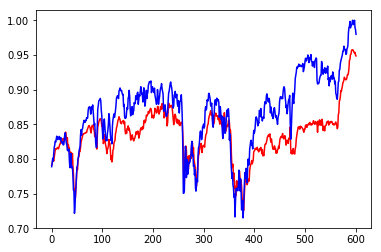

In [30]:
y_pred= model(validateData.view(602,-1).float())
y_pred.shape

plt.plot(y_pred.cpu().detach().numpy(), 'r-')
plt.plot(y_test, 'b-')
plt.show()

In [31]:
# build the model 
# model = BaselineModel(9, 9, 1).to(device)
# summary(model,(1, 9, 9))

# # define the loss function and the optimiser
# loss_function = nn.MSELoss()
# optimiser = optim.Adam(model.parameters())

# #training on gpu
# trial = Trial(model, optimiser, loss_function).to(device)
# trial.with_generators(trainloader)
# trial.run(epochs=10)

In [32]:
# y_pred= model(validateData.view(602,-1).float().to(device))
# y_pred.shape

# plt.plot(y_pred.cpu().detach().numpy(), 'r-')
# plt.plot(y_test, 'b-')
# plt.show()

In [33]:
print(trainData[0].shape,testData[0].shape)

torch.Size([1, 3, 3]) torch.Size([1])


In [34]:
class gradient_generator():
    
    def __init__(self, model):
        self.model = model.to('cpu')
        self.gradients = None
        # Put model in evaluation mode
        self.model.eval()
        # Hook the first layer to get the gradient
        self.hook = self.hook_layers()
    def hook_layers(self):    
        def hook_function(module, grad_in, grad_out):
#             print("hook called")
#             print(grad_out[0])
            self.gradients = grad_out[0]
        first_layer = list(self.model._modules.items())[0][1]
        hook = first_layer.register_forward_hook(hook_function)
        return hook
    def generate_gradient(self, inputs):
        self.model.zero_grad()
        _ = model(inputs)
        self.hook.remove()
        return self.gradients
    

grad = torch.zeros((2412,9))
i = 0
for data in trainloader:
    # get the inputs
    inputs, labels = data
    
    GG = gradient_generator(model)
    temp = GG.generate_gradient(inputs)
    grad[i,:] = temp
    i += 1

grad

tensor([[ 1.2336,  0.5619, -0.3227,  ..., -0.6357, -0.0572, -0.4528],
        [ 0.8537,  0.5007, -0.1345,  ..., -0.3792, -0.1109, -0.2992],
        [ 0.8284,  0.5483, -0.1495,  ..., -0.3262, -0.1113, -0.2540],
        ...,
        [ 0.7737,  0.4349, -0.2295,  ..., -0.4129, -0.2061, -0.3631],
        [ 0.8449,  0.4949, -0.2209,  ..., -0.4026, -0.1793, -0.3500],
        [ 1.2950,  0.5813, -0.3567,  ..., -0.6650, -0.0509, -0.4776]],
       grad_fn=<CopySlices>)

In [35]:
np.mean(grad.data.numpy(), axis = 0)

array([ 1.142564  ,  0.5622558 , -0.32813314, -0.06252784,  0.4844831 ,
        0.8382531 , -0.56842446, -0.11477159, -0.44437626], dtype=float32)

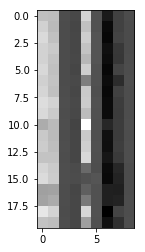

In [36]:
a = trainData.view(2412,-1).float()
image = a[500:520, :]
grad_img = grad.data[500:520,:]

plt.imshow(grad_img * image, cmap=plt.get_cmap('gray'))

In [37]:
print(validateData.shape)
validateloader = DataLoader(validateData.view(602,-1).float(), batch_size=1, shuffle=True)

dataiter = iter(validateloader)
images = dataiter.next()
print(type(images)) 
print(images.shape)

torch.Size([602, 1, 3, 3])
<class 'torch.Tensor'>
torch.Size([1, 9])


In [39]:
grad = torch.zeros((602,9))
i = 0
for data in validateloader:
    # get the inputs
    inputs = data
    
    GG = gradient_generator(model)
    temp = GG.generate_gradient(inputs)
    grad[i,:] = temp
    i += 1

grad

tensor([[ 1.1025,  0.5936, -0.4514,  ..., -0.5283, -0.2375, -0.5079],
        [ 1.1342,  0.5779, -0.5175,  ..., -0.5848, -0.2918, -0.5765],
        [ 1.1828,  0.5987, -0.5077,  ..., -0.5976, -0.2638, -0.5695],
        ...,
        [ 1.1526,  0.6239, -0.4634,  ..., -0.5375, -0.2235, -0.5094],
        [ 1.1646,  0.5908, -0.5094,  ..., -0.5877, -0.2626, -0.5651],
        [ 1.1301,  0.5840, -0.4697,  ..., -0.5651, -0.2587, -0.5422]],
       grad_fn=<CopySlices>)

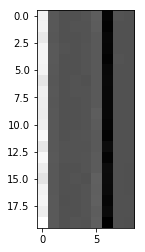

In [40]:
image = validateData.view(602,-1).float()
grad_img = grad.data

plt.imshow(grad_img[500:520,:] * image[500:520,:], cmap=plt.get_cmap('gray'))

In [41]:
data = grad_img
data = data.numpy()
data = np.mean(data, axis = 0)

print(data)

[ 1.2096425   0.613513   -0.50966847 -0.01292719 -0.09650362  1.6087935
 -0.5995805  -0.2522809  -0.5702803 ]


In [42]:
print(np.where(data>0))

(array([0, 1, 5], dtype=int64),)
